In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Loading the Data

In [2]:
# Load the csv data file
dataset = pd.read_csv('Training Dataset.csv')
# dataset = pd.DataFrame(data[0])
dataset.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


Familiarizing with the Data

In [3]:
# Displays all the info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

We can see the data types of all the attributes are int64, no categorical values or strings, so no need to change attribute values

In [4]:
# Display the shape of the dataset
dataset.shape


(11055, 32)

In [5]:
# Display all the attributes of the dataset
dataset.columns


Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [6]:
# Display attributes values data type
dataset.dtypes


id                             int64
having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [7]:
# Display the total number of values for the class, Result
dataset['Result'].value_counts()


 1    6157
-1    4898
Name: Result, dtype: int64

Visualizing the Data

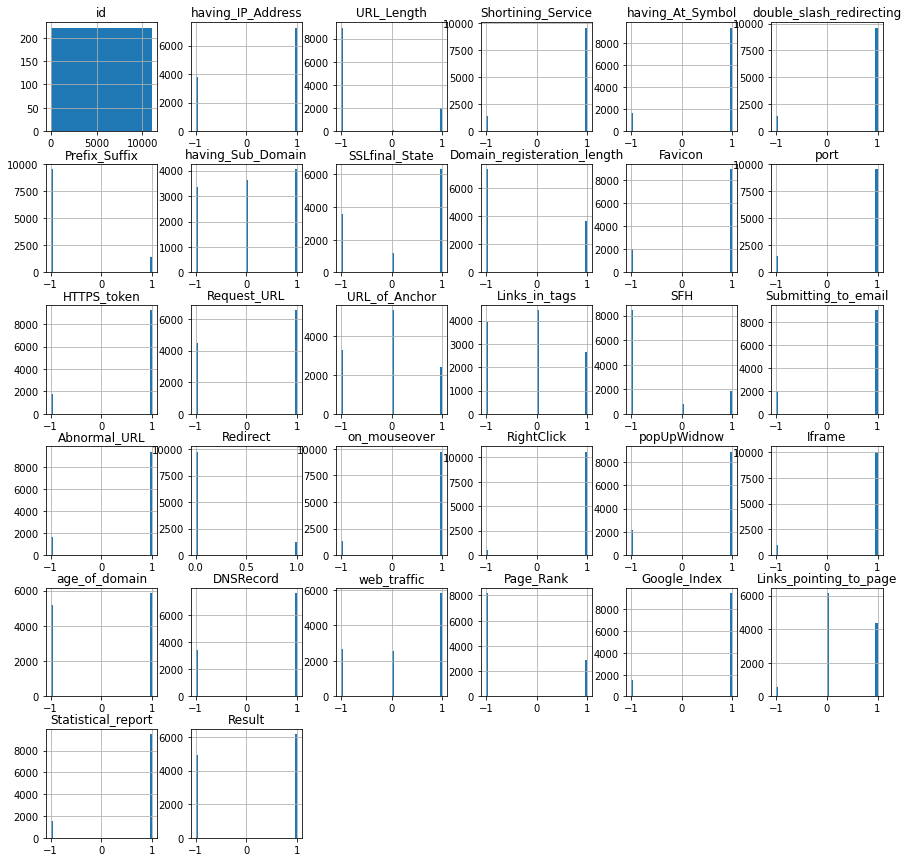

In [8]:
# Plotting the histogram of the data to see the distribution
dataset.hist(bins = 50,figsize = (15,15))
plt.show()

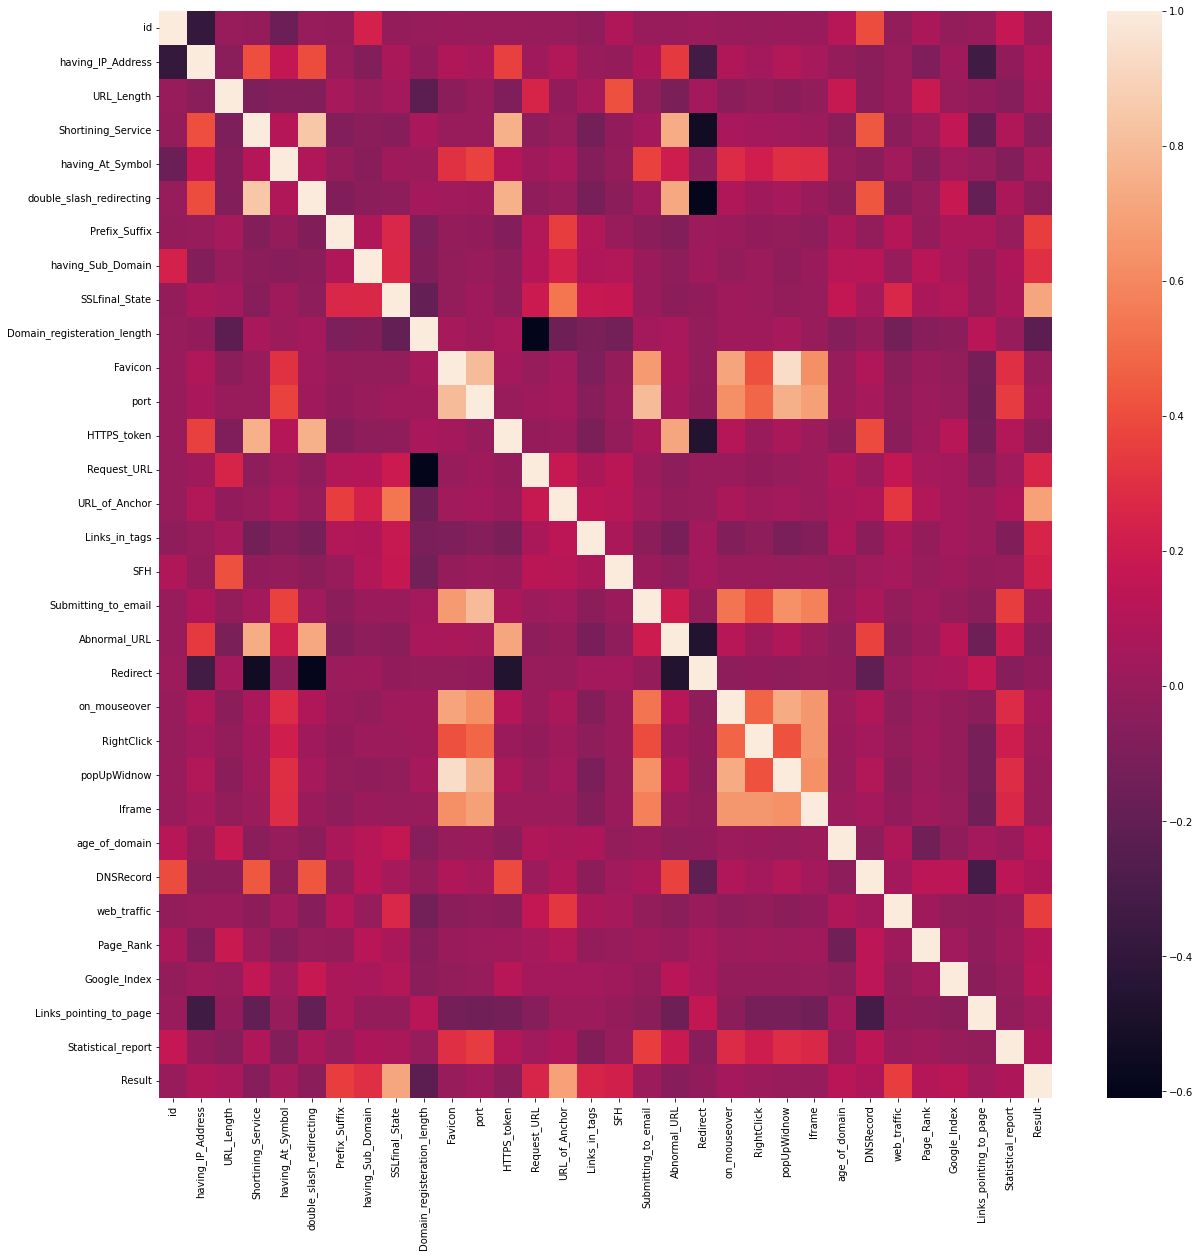

In [9]:
# Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr())
plt.show()

Data Preprocessing

In [10]:
dataset.describe()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Dropping the id column cause it is not useful for the model
dataset1 = dataset.drop(['id'], axis = 1).copy()
dataset1.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [12]:
# Checking the data for null or missing values
dataset1.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [13]:
#Shuffling the rows in the dataset so that when splitting the train and test set are equaly distributed 
# dataset1 = dataset1.sample(frac=1).reset_index(drop=True)
# dataset1.head()

Splitting the Data

In [14]:
# Sepratating & assigning features and target columns to x & y
y = dataset1['Result']
x = dataset1.drop('Result', axis=1)
x.shape, y.shape


((11055, 30), (11055,))

In [15]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42, shuffle=True)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

# Display the shuffled dataset
x_train.head(), y_train.head(), x_test.head(), y_test.head()

(      having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
 7118                 -1          -1                   1                 1   
 6384                  1          -1                   1                 1   
 6455                 -1          -1                   1                 1   
 5033                  1          -1                   1                 1   
 3661                  1          -1                   1                 1   
 
       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
 7118                         1              1                  1   
 6384                         1             -1                  1   
 6455                         1             -1                  0   
 5033                         1              1                 -1   
 3661                         1             -1                  1   
 
       SSLfinal_State  Domain_registeration_length  Favicon  ...  RightClick  \
 7118               1             

In [16]:
from sklearn.metrics import accuracy_score

# Creating lists to store the model peroformance results
ML_Model = []
acc_train = []
acc_test = []

# function to store the results
def storeResults(model, a, b):
    ML_Model.append(model)
    acc_train.append(round(a,3))
    acc_test.append(round(b,3))

Decision Tree Classifier

In [17]:
# Default Decision Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

classfier = DecisionTreeClassifier(random_state=42)
classfier.fit(x_train, y_train)

#predicting the target value from the model for the samples with default values
y_test_tree = classfier.predict(x_test)
y_train_tree = classfier.predict(x_train)

acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:3f}".format(acc_test_tree))
print("Classification report - \n", classification_report(y_test, y_test_tree))
print(confusion_matrix(y_test, y_test_tree))

Decision Tree: Accuracy on training Data: 0.990653
Decision Tree: Accuracy on test Data: 0.950927
Classification report - 
               precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1906
           1       0.96      0.96      0.96      2516

    accuracy                           0.95      4422
   macro avg       0.95      0.95      0.95      4422
weighted avg       0.95      0.95      0.95      4422

[[1799  107]
 [ 110 2406]]


Pre-Pruning

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# instatiate the model
# max_depth represents the maximum depth the tree can go

# Sample max_depth, min_samples_split, and min_samples_leaf to test out and find the best one to avoid overfitting
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

# Make a default decision tree

classfier = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(classfier, param_grid, scoring="roc_auc", n_jobs = -1, cv=3).fit(x_train, y_train)

# Check the AUC ROC score to decide the max_depth, min_samples_split, and min_samples_leaf values 

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(x_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(x_test)))
print(confusion_matrix(y_test, y_test_tree))


Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
CV score for GS 0.9811359989047083
Train AUC ROC Score for GS:  0.9593528361633036
Test AUC ROC Score for GS:  0.9413904213453624
[[1799  107]
 [ 110 2406]]


Pre_Pruning accuracy score

In [19]:
classfier = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10)
classfier.fit(x_train, y_train)

#predicting the target value from the model for the samples with default values
y_test_tree = classfier.predict(x_test)
y_train_tree = classfier.predict(x_train)

acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:3f}".format(acc_test_tree))
print("Classification report - \n", classification_report(y_test, y_test_tree))

Decision Tree: Accuracy on training Data: 0.959294
Decision Tree: Accuracy on test Data: 0.941429
Classification report - 
               precision    recall  f1-score   support

          -1       0.91      0.96      0.93      1906
           1       0.97      0.93      0.95      2516

    accuracy                           0.94      4422
   macro avg       0.94      0.94      0.94      4422
weighted avg       0.94      0.94      0.94      4422



Post-Pruning accuracry score to decrease overfitting

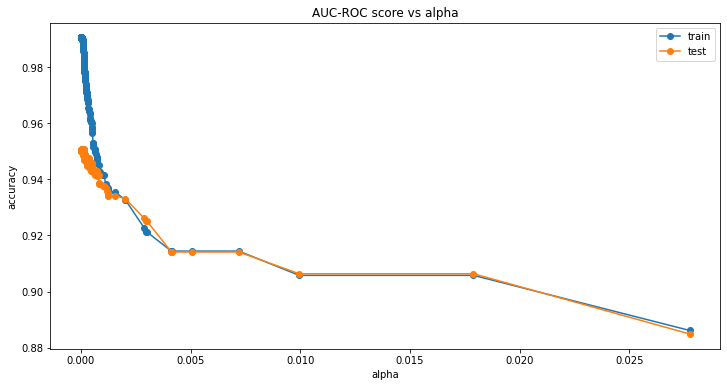

In [20]:
classfier = DecisionTreeClassifier(random_state=42)
classfier.fit(x_train, y_train)

# compute ccp_alpha values
path = classfier.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    classfier = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    classfier.fit(x_train, y_train)
    clfs.append(classfier)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train, classfier.predict(x_train)) for classfier in clfs]
test_scores = [roc_auc_score(y_test, classfier.predict(x_test)) for classfier in clfs]

fig, ax = plt.subplots(figsize = (12,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

From the above figure we can see

In [21]:
# Fit is called to train the algorithm on the trainig data which is passed as parameter to the "fit" method
# Classify the dataset using the above given values

classfier = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, ccp_alpha=0.001)
classfier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=2,
                       min_samples_split=10)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

#predicting the target value from the model for the samples after post-pruning
y_test_tree = classfier.predict(x_test)
y_train_tree = classfier.predict(x_train)

acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:3f}".format(acc_test_tree))
print("Classification report - \n", classification_report(y_test, y_test_tree))
print(confusion_matrix(y_test, y_test_tree))

Decision Tree: Accuracy on training Data: 0.942409
Decision Tree: Accuracy on test Data: 0.936906
Classification report - 
               precision    recall  f1-score   support

          -1       0.91      0.95      0.93      1906
           1       0.96      0.93      0.94      2516

    accuracy                           0.94      4422
   macro avg       0.93      0.94      0.94      4422
weighted avg       0.94      0.94      0.94      4422

[[1809   97]
 [ 182 2334]]


In [23]:
# Decision tree visualization
from sklearn import tree

# Garbage Collector to handle Out of Memory Error when visualizing
import gc
gc.collect()


# Visualizing decision tree using "plot_tree"
fn=['having_IP_Address',\
'URL_Length','Shortining_Service','having_At_Symbol','double_slash_redirecting','Prefix_Suffix\
','having_Sub_Domain \
','SSLfinal_State \
','Domain_registeration_length \
','Favicon \
','port \
','HTTPS_token \
','Request_URL \
','URL_of_Anchor \
','Links_in_tags \
','SFH \
','Submitting_to_email \
','Abnormal_URL \
','Redirect \
','on_mouseover \
','RightClick \
','popUpWidnow \
','Iframe \
','age_of_domain \
','DNSRecord \
','web_traffic \
','Page_Rank \
','Google_Index \
','Links_pointing_to_page \
','Statistical_report' \
]

cn = ['-1','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

tree.plot_tree(classfier, feature_names=fn, class_names=cn, filled=True, fontsize=6, rounded=True)
plt.show()

plt.savefig('Output2.png')


<Figure size 432x288 with 0 Axes>

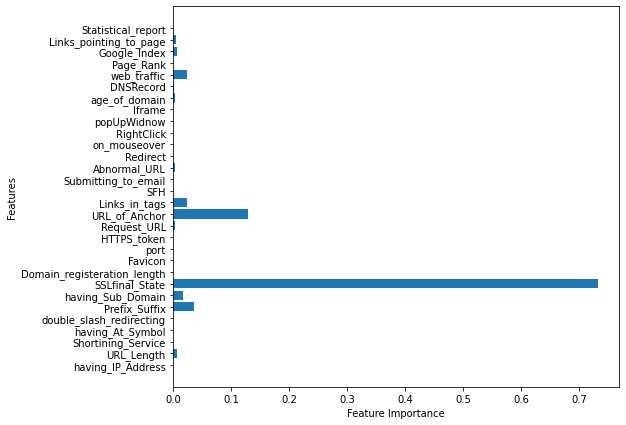

In [24]:
plt.figure(figsize=(8,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), classfier.feature_importances_, align="center")
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

Random Forest Model

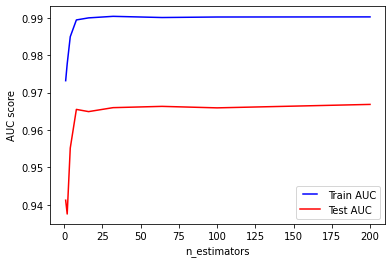

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We can see that for my data, I can stop at 100 trees as increasing the number of trees doesn't decrease the test performance. Hence after certain number of trees the performance tend to stay in a certain value.

n_estimator = 100

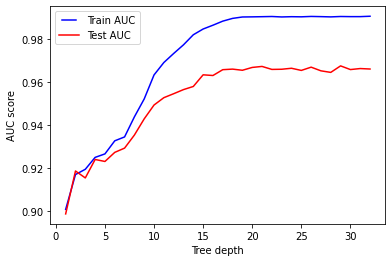

In [27]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

From the above figure we can see that my model overfits for large depth values.

max_depth = 17

In [28]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import CalledProcessError
from IPython import display

# instantiate the model
# Giving the maximum n_estimators value after trying different values for max accuracy
forest = RandomForestClassifier(max_depth=17, n_estimators=100)

# fit the model 
forest.fit(x_train, y_train)

# fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
# for index in range(0,5):
#     tree.plot_tree(forest.estimators_[index],
#                 feature_names = fn, 
#                 class_names=cn,
#                 filled = True,
#                 ax = axes[index]);
#     axes[index].set_title('Estimator: ' + str(index), fontsize=11)
# fig.savefig('forest_individualtree.png')


RandomForestClassifier(max_depth=17)

In [29]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("Classification report - \n", classification_report(y_test, y_test_forest))
print(confusion_matrix(y_test, y_test_forest))

Random forest: Accuracy on training Data: 0.989
Random forest: Accuracy on test Data: 0.966
Classification report - 
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1906
           1       0.96      0.98      0.97      2516

    accuracy                           0.97      4422
   macro avg       0.97      0.96      0.97      4422
weighted avg       0.97      0.97      0.97      4422

[[1805  101]
 [  48 2468]]


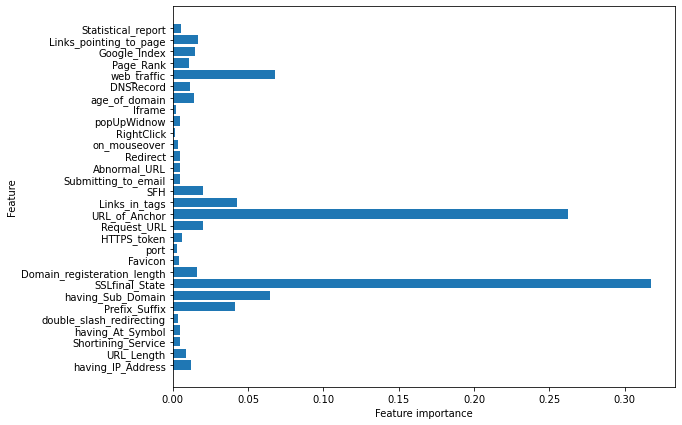

In [30]:
# checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [31]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

Support Vector Machines

In [32]:
# Support vector machine model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, LeaveOneOut

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

# fit the model
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=12)

In [33]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(x_test)
y_train_svm = svm.predict(x_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))
print("Classification report - \n", classification_report(y_test, y_test_svm))
print(confusion_matrix(y_test, y_test_svm))

SVM: Accuracy on training Data: 0.930
SVM : Accuracy on test Data: 0.926
Classification report - 
               precision    recall  f1-score   support

          -1       0.92      0.91      0.91      1906
           1       0.93      0.94      0.94      2516

    accuracy                           0.93      4422
   macro avg       0.92      0.92      0.92      4422
weighted avg       0.93      0.93      0.93      4422

[[1726  180]
 [ 149 2367]]


In [34]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

Comparison of Models

In [35]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.942,0.937
1,Random Forest,0.989,0.966
2,SVM,0.930,0.926


In [36]:
#Sorting the dataframe on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,0.989,0.966
0,Decision Tree,0.942,0.937
2,SVM,0.930,0.926


In [37]:
# save Random Forest model to file
import pickle
pickle.dump(forest, open("RandomForestClassifier.pickle.dat", "wb"))

In [38]:
# load model from file
loaded_model = pickle.load(open("RandomForestClassifier.pickle.dat", "rb"))
loaded_model


a = ['1','-1','1','1','1','-1','-1','1','-1','1','1','1','1','0','0','-1','1','1','0','1','1','1','1','-1','1','1','-1','1','0','1']

loaded_model.predict([a])


C:\Users\arega\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)